In [1]:
import scanpy as sc
import pandas
import networkx as nx
import random
import scIB
from sklearn import metrics
from multiprocessing import Pool
import numpy as np
from itertools import repeat

In [5]:
test = sc.read("/home/icb/daniel.strobl/group.daniela/small_test.h5ad")

In [3]:
test_integrated = sc.read("/home/icb/daniel.strobl/group.daniela/atlases_integrated/scanorama.h5ad")

In [90]:
pancreas_scanorama = sc.read('/storage/groups/ml01/workspace/scIB/pancreas/integration/unscaled/hvg/scanorama.h5ad')

In [215]:
pancreas_seurat = sc.read('/storage/groups/ml01/workspace/scIB/pancreas/integration/unscaled/hvg/R/seurat.h5ad')

In [206]:
pancreas_mnn = sc.read('/storage/groups/ml01/workspace/scIB/pancreas/integration/unscaled/hvg/mnn.h5ad')

In [216]:
pancreas_harmony = sc.read('/storage/groups/ml01/workspace/scIB/pancreas/integration/unscaled/hvg/R/harmony.h5ad')

In [261]:
integrated_small = sc.pp.subsample(test_integrated, n_obs=4000)

In [6]:
scIB.pp.reduce_data(test)

HVG
Calculating 2000 HVGs for reduce_data.
Computed 1999 highly variable genes
PCA
Nearest Neigbours


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


UMAP


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


In [91]:
scIB.pp.reduce_data(pancreas_scanorama, use_rep='X_emb', pca=False)

HVG
Calculating 2000 HVGs for reduce_data.
Computed 1999 highly variable genes
Nearest Neigbours


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


UMAP


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


In [207]:
scIB.pp.reduce_data(pancreas_mnn)

HVG
Calculating 2000 HVGs for reduce_data.
Computed 1999 highly variable genes
PCA
Nearest Neigbours


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


UMAP


In [217]:
scIB.pp.reduce_data(pancreas_scanorama)
scIB.pp.reduce_data(pancreas_mnn)
scIB.pp.reduce_data(pancreas_seurat)
scIB.pp.reduce_data(pancreas_harmony, use_rep='X_emb', pca=False)

HVG
Calculating 2000 HVGs for reduce_data.
Computed 1999 highly variable genes
PCA
Nearest Neigbours


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


UMAP


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


HVG
Calculating 2000 HVGs for reduce_data.
Computed 1999 highly variable genes
PCA
Nearest Neigbours


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


UMAP
HVG
Calculating 2000 HVGs for reduce_data.
Computed 2000 highly variable genes
PCA
Nearest Neigbours


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


UMAP
HVG
Calculating 2000 HVGs for reduce_data.
Computed 1999 highly variable genes
Nearest Neigbours


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


UMAP


In [218]:
scIB.metrics.silhouette(pancreas_scanorama, 'celltype', embed='X_emb')

0.4745702577225352

In [219]:
scIB.metrics.silhouette(pancreas_seurat, 'celltype')

0.44946426525712013

In [220]:
scIB.metrics.silhouette(pancreas_mnn, 'celltype')

0.5192607454955578

In [221]:
scIB.metrics.silhouette(pancreas_harmony, 'celltype', embed='X_emb')

0.34269359758773493

In [201]:
def sil_single(graph, index, labels):
    dist = pandas.Series(nx.single_source_dijkstra_path_length(graph, index))
    #print(labels[dist.index].value_counts())
    if labels[dist.index].value_counts()[labels[index]]<0.9*labels.value_counts()[labels[index]]:
        return -1
    #if labels.drop[dist.index]
    labels = pandas.Categorical(labels[dist.index]).codes
    occ = np.bincount(labels)
    occ[occ==0]=-1
    tmp = np.bincount(labels, dist)/occ
    tmp[tmp==0]=np.max(tmp*5)
    same = tmp[labels[0]]
    nearest = np.min(np.delete(tmp, labels[0]))
    #print(nearest)
    return (nearest-same)/np.maximum(nearest, same)
    

In [42]:
def sil(adata, batch_var, subsampling, pool):
    #pool = Pool(processes=n_threads)
    G = nx.from_scipy_sparse_matrix(adata.uns['neighbors']['connectivities'])
    #labels = pandas.Categorical(adata.obs[batch_var]).codes
    #occ = np.bincount(labels)
    labels = pandas.Categorical(adata.obs[batch_var])
    testrange = random.sample(range(len(adata.obs_names)), subsampling)
    #def sil_single_tmp(index):
    #return sil_single(G, index, labels, occ)
    results = pool.starmap(sil_single, zip(repeat(G), testrange, repeat(labels)))
    pool.close()
    pool.join()
    return results, testrange

In [229]:
pool = Pool(processes=None)
res = sil(pancreas_mnn, 'celltype', 1000, pool)

In [228]:
pool=Pool(processes=None)
res_seurat = sil(pancreas_seurat, 'celltype', 1000, pool)

In [223]:
pool=Pool(processes=None)
res_harmony = sil(pancreas_harmony, 'celltype', 1000, pool)

In [230]:
(np.mean(res_harmony[0])+1)/2

0.44081687774959033

In [231]:
((np.mean(res_scanorama[0]))+1)/2

0.0

In [232]:
((np.mean(res_seurat[0]))+1)/2

0.45979775426135894

In [234]:
((np.mean(res[0]))+1)/2

0.42193148463306335

In [156]:
np.corrcoef(res_scanorama[0], res_emb_scan[res_scanorama[1]])

array([[1.        , 0.49940712],
       [0.49940712, 1.        ]])

In [153]:
res_emb_scan = metrics.silhouette_samples(pancreas_scanorama.obsm['X_emb'], pancreas_scanorama.obs['celltype'])

In [235]:
res_emb_harmony = metrics.silhouette_samples(pancreas_harmony.obsm['X_emb'], pancreas_harmony.obs['celltype'])

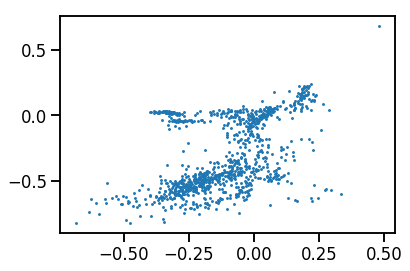

In [236]:
plt.scatter(res_harmony[0], res_emb_harmony[res_harmony[1]], s=2)

In [211]:
res_emb = metrics.silhouette_samples(pancreas_mnn.obsm['X_pca'], pancreas_mnn.obs['celltype'])

In [212]:
np.mean(res_emb)

0.03852149

In [52]:
np.mean(res_emb)

0.03852149

In [23]:
res_emb[res[1]]

array([ 0.1388444 ,  0.13326834, -0.1844506 , ...,  0.17772321,
        0.14828186, -0.04906055], dtype=float32)

In [47]:
import matplotlib.pyplot as plt

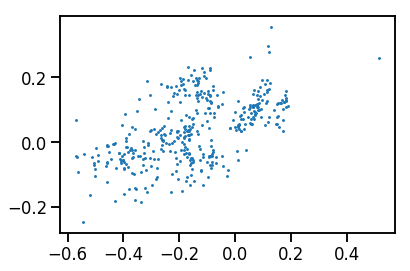

In [213]:
plt.scatter(res[0], res_emb[res[1]], s=2)

In [238]:
np.corrcoef(res_harmony[0], res_emb_harmony[res_harmony[1]])

array([[1.        , 0.45371666],
       [0.45371666, 1.        ]])